<a href="https://colab.research.google.com/github/adepriciliaa/AdePricilia/blob/main/Project%20Artificial%20Intelligence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Library

In [ ]:
!pip install -q snscrape==0.3.4
# Import library
import datetime as dt
import re
import string
import snscrape.modules.twitter as sntwitter
import tweepy
import pandas as pd
import ast
pd.options.mode.chained_assignment = None
import numpy as np
import nltk
nltk.download('punkt')
import nltk
nltk.download('stopwords')
seed = 0
np.random.seed(seed)
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
import seaborn as sns
sns.set(style = 'whitegrid')



from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

!pip install Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from wordcloud import WordCloud

from multiprocessing import Pool
from functools import partial
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Embedding, Dense, Dropout, LSTM
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from keras.callbacks import EarlyStopping
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer

from google.colab import drive
drive.mount('/content/drive')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 209 kB 6.4 MB/s 
Mounted at /content/drive


# 1. Mengambil 10000 Data dari Twitter. Keyword : Valorant

In [ ]:
#menentukan maximal tweets yang akan diambil
maxTweets = 10000
tweets_list2 = []

#mencari data tweets sesuai keyword
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('Valorant since:2020-03-31 until:2020-12-31 lang:id').get_items()):
    if i>maxTweets:
      break
    tweets_list2.append([tweet.date,tweet.content, tweet.username])

In [ ]:
tweets_df2 = pd.DataFrame(tweets_list2, columns=['Datetime','Text', 'Username'])
tweets_df2

tweets_df2.to_csv('drive/My Drive/10000Dataset.csv',sep = ',',index = False)
tweets = pd.read_csv('drive/My Drive/10000Dataset.csv')
tweets

,Datetime,Text,Username
0,2020-12-30 23:58:54+00:00,"Rankeds, Valorant y no se que mas! :V (❛ 👅 ͡❛)...",joub_sak
1,2020-12-30 23:14:34+00:00,"2020: pandemi, kuliah online, project ketunda,...",skuttlebutt_
2,2020-12-30 21:44:37+00:00,Nabuang namantag valorant ah HAHAHAHA,2ez4jed
3,2020-12-30 21:27:16+00:00,"@hastadvalorant Boa hastad, tu joga mto valora...",djonatannk
4,2020-12-30 21:16:58+00:00,@TheDeansturr @OfficialKyP @PlayVALORANT How m...,Ron1nSamurai
...,...,...,...
9997,2020-10-24 22:49:07+00:00,"@darddablue Masiiii, lagi main valorant, nanti...",thishitbe
9998,2020-10-24 22:44:53+00:00,@Fernaando_ss @ByRuyMix @PlayVALORANT KH Soto? 🤔,KumihoEsports
9999,2020-10-24 22:28:59+00:00,@dounnieydw @Jae_Day6 wkwk sama.... aku juga g...,sikkeureo
10000,2020-10-24 22:27:17+00:00,valorant 34 kill rekor aq,yoshei4


#2. Preprocessing Data

In [ ]:
!wget https://github.com/evanmartua34/Twitter-COVID19-Indonesia-Sentiment-Analysis---Lexicon-Based/raw/master/cleaning_source/update_combined_slang_words.txt
!ls

--2022-06-29 23:21:04--  https://github.com/evanmartua34/Twitter-COVID19-Indonesia-Sentiment-Analysis---Lexicon-Based/raw/master/cleaning_source/update_combined_slang_words.txt
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/evanmartua34/Twitter-COVID19-Indonesia-Sentiment-Analysis---Lexicon-Based/master/cleaning_source/update_combined_slang_words.txt [following]
--2022-06-29 23:21:04--  https://raw.githubusercontent.com/evanmartua34/Twitter-COVID19-Indonesia-Sentiment-Analysis---Lexicon-Based/master/cleaning_source/update_combined_slang_words.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 

In [ ]:
# Download data untuk tokenisasi dan penghapusan stop words
slangJson = {}  #mendefinsikan dictionary kosong yang akan dipopulate
                #dengan data kata-kata slang dari file update_combined_slang_words.txt

# parse file menjadi sebuah python Dictionary
with open('update_combined_slang_words.txt', 'r') as slangFile:
  slangJson = ast.literal_eval(slangFile.read())

print(slangJson)
print(slangJson['@'])

{'@': 'di', 'abis': 'habis', 'ad': 'ada', 'adlh': 'adalah', 'afaik': 'as far as i know', 'ahaha': 'haha', 'aj': 'saja', 'ajep-ajep': 'dunia gemerlap', 'ak': 'saya', 'akika': 'aku', 'akkoh': 'aku', 'akuwh': 'aku', 'alay': 'norak', 'alow': 'halo', 'ambilin': 'ambilkan', 'ancur': 'hancur', 'anjrit': 'anjing', 'anter': 'antar', 'ap2': 'apa-apa', 'apasih': 'apa sih', 'apes': 'sial', 'aps': 'apa', 'aq': 'saya', 'aquwh': 'aku', 'asbun': 'asal bunyi', 'aseekk': 'asyik', 'asekk': 'asyik', 'asem': 'asam', 'aspal': 'asli tetapi palsu', 'astul': 'asal tulis', 'ato': 'atau', 'au ah': 'tidak mau tahu', 'awak': 'saya', 'ay': 'sayang', 'ayank': 'sayang', 'b4': 'sebelum', 'bakalan': 'akan', 'bandes': 'bantuan desa', 'bangedh': 'banget', 'banpol': 'bantuan polisi', 'banpur': 'bantuan tempur', 'basbang': 'basi', 'bcanda': 'bercanda', 'bdg': 'bandung', 'begajulan': 'nakal', 'beliin': 'belikan', 'bencong': 'banci', 'bentar': 'sebentar', 'ber3': 'bertiga', 'beresin': 'membereskan', 'bete': 'bosan', 'beud': 

In [ ]:
gkounter = 0 # menggunakan variabel ini untuk mencatat berapa banyak data
             # yang sudah diproses oleh fungsi-fungsi dibawah ini
            
def cleaningText(text):
    global gkounter
    text = re.sub(r'@[A-Za-z0-9]+', '', str(text)) # hapus mentions
    text = re.sub(r'#[A-Za-z0-9]+', '', str(text)) # hapus hashtag
    text = re.sub(r'RT[\s]', '',  str(text)) # hapus RT
    text = re.sub(r"http\S+", '',  str(text))# hapus link
    text = re.sub(r'[0-9]+', '', str(text)) # hapus angka
    text = re.sub(r'[^0-9A-Za-z \t]|(\w+:\/\/\S+)+','', str (text)) # hapus emoticon
    text = text.replace('\n', ' ')# ganti baris baru dengan spasi
    text = text.translate(str.maketrans('', '', string.punctuation)) # hapus semua tanda baca
    text = text.strip(' ') # hapus spasi kosong yang ada di awal dan di akhir teks
    print(f"cleaned {gkounter} text")
    gkounter += 1
    return text

#casefolding
def casefoldingText(text): # mengubah huruf menjadi huruf kecil
    global gkounter
    text = text.lower() 
    print(f"casefolded {gkounter} text")
    gkounter += 1
    return text

#tokenizing
def tokenizingText(text): # memisahkan string menjadi kumpulan token
    global gkounter
    text = word_tokenize(text) 
    print(f"tokenized {gkounter} text")
    gkounter += 1
    return text

#normalisasi slang words 
def normalizeSlangWords(text):  #normalisasi kata alay/slang menjadi kata baku bahasa indonesia
    global gkounter
    for i in range(len(text)):
      if text[i] in slangJson:
        text[i] = slangJson[text[i]]
    print(f"normalized slang words {gkounter} text")
    gkounter += 1
    return text

#normalisasi slang word - filtering text
#https://github.com/masdevid/ID-Stopwords 
def filteringText(text): # hapus stop words
    global gkounter
    listStopwords = set(stopwords.words('indonesian'))
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered 
    print(f"filtered {gkounter} text")
    gkounter += 1
    return text

#stemming
def stemmingText(text): # buat semua kata menjadi kata baku (contoh: 'melelahkan' => 'lelah')
    global gkounter
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    text = [stemmer.stem(word) for word in text]
    print(f"stemmed {gkounter} text")
    gkounter += 1
    return text

def toSentence(list_words): # fungsi untuk menyambung kembali token-token kata menjadi satu kalimat
    sentence = ' '.join(word for word in list_words)
    return sentence
def parallelize (data, func, num_of_processes=2):
  data_split = np.array_split(data, num_of_processes)
  pool = Pool(num_of_processes)
  data = pd.concat(pool.map(func,data_split))

  pool.close()

  pool.join()

  return data

def run_on_subset(func, data_subset):
  return data_subset.apply(func)

def parallelize_on_rows(data, func, num_of_processes=2):
  return parallelize(data, partial(run_on_subset, func),num_of_processes)


In [ ]:
#preprocessing tweets data
gkounter = 0 
tweets['text_clean'] = tweets ['Text'].apply(cleaningText)
gkounter = 0 
tweets['text_clean'] = tweets ['text_clean'].apply(casefoldingText)
gkounter = 0 
tweets['text_preprocessed'] = tweets ['text_clean'].apply(tokenizingText)
gkounter = 0 
tweets['text_preprocessed'] = tweets ['text_preprocessed'].apply(normalizeSlangWords)
gkounter = 0 
tweets['text_preprocessed'] = tweets ['text_preprocessed'].apply(filteringText)

Streaming output truncated to the last 5000 lines.
filtered 5001 text
filtered 5002 text
filtered 5003 text
filtered 5004 text
filtered 5005 text
filtered 5006 text
filtered 5007 text
filtered 5008 text
filtered 5009 text
filtered 5010 text
filtered 5011 text
filtered 5012 text
filtered 5013 text
filtered 5014 text
filtered 5015 text
filtered 5016 text
filtered 5017 text
filtered 5018 text
filtered 5019 text
filtered 5020 text
filtered 5021 text
filtered 5022 text
filtered 5023 text
filtered 5024 text
filtered 5025 text
filtered 5026 text
filtered 5027 text
filtered 5028 text
filtered 5029 text
filtered 5030 text
filtered 5031 text
filtered 5032 text
filtered 5033 text
filtered 5034 text
filtered 5035 text
filtered 5036 text
filtered 5037 text
filtered 5038 text
filtered 5039 text
filtered 5040 text
filtered 5041 text
filtered 5042 text
filtered 5043 text
filtered 5044 text
filtered 5045 text
filtered 5046 text
filtered 5047 text
filtered 5048 text
filtered 5049 text
filtered 5050 text

In [ ]:
#sebelum peneliti melakukan stemming, peneliti menghapus data tweet
tweets.drop_duplicates(subset = 'text_clean', inplace = True)
print(tweets.count)

gkounter = 0
tweets['text_preprocessed'] = parallelize_on_rows(tweets['text_preprocessed'], stemmingText)

print("exporting to csv")

tweets.to_csv('/content/drive/MyDrive/10000Dataset-Cleaned.csv',index= False, header = True, index_label= None)

Streaming output truncated to the last 5000 lines.
stemmed 2120 text
stemmed 2121 text
stemmed 2143 text
stemmed 2122 text
stemmed 2144 text
stemmed 2145 text
stemmed 2123 text
stemmed 2146 text
stemmed 2124 text
stemmed 2147 text
stemmed 2125 text
stemmed 2126 text
stemmed 2127 text
stemmed 2148 text
stemmed 2128 text
stemmed 2149 text
stemmed 2129 text
stemmed 2150 text
stemmed 2151 text
stemmed 2152 text
stemmed 2130 text
stemmed 2131 text
stemmed 2153 text
stemmed 2154 text
stemmed 2132 text
stemmed 2133 text
stemmed 2155 text
stemmed 2156 text
stemmed 2134 text
stemmed 2135 text
stemmed 2136 text
stemmed 2157 text
stemmed 2137 text
stemmed 2138 text
stemmed 2139 text
stemmed 2140 text
stemmed 2141 text
stemmed 2158 text
stemmed 2159 text
stemmed 2142 text
stemmed 2143 text
stemmed 2160 text
stemmed 2161 text
stemmed 2162 text
stemmed 2144 text
stemmed 2145 text
stemmed 2146 text
stemmed 2147 text
stemmed 2163 text
stemmed 2148 text
stemmed 2164 text
stemmed 2149 text
stemmed 2150 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer(analyzer='word', max_features=20000)

count_vector.fit(dataset['Preprocess_Text'])
train_x = count_vector.transform(train_x)
valid_x = count_vector.transform(valid_x)tweets = pd.read_csv('/content/drive/MyDrive/10000Dataset-Cleaned.csv')
for i, text in enumerate(tweets['text_preprocessed']):
  tweets['text_preprocessed'][i] = str(tweets['text_preprocessed'][i]).replace("'", "")\
  .replace(',','').replace(']','').replace('[','')
  list_words=[]
  for word in tweets['text_preprocessed'][i].split():
    list_words.append(word)
    tweets['text_preprocessed'][i] = list_words
tweets

,Datetime,Text,Username,text_clean,text_preprocessed
0,2022-06-24 23:28:36+00:00,"@babufess Fyi gacuma game genshin aja, jadi ka...",Eulayakarataki,fyi gacuma game genshin aja jadi kalian smua h...,"[bagai, informasi, gacuma, game, genshin, smua..."
1,2022-06-24 23:16:41+00:00,@Multiplayer_TV Valorant diaya kasmaca,BerkeBixi,tv valorant diaya kasmaca,"[tv, valorant, diaya, kasmaca]"
2,2022-06-24 23:05:42+00:00,Kembali lagi dengan badut Valorant profesional...,LouisAguillard,kembali lagi dengan badut valorant profesional...,"[badut, valorant, profesional, tani, malam, mi..."
3,2022-06-24 22:39:51+00:00,@_zeniva @PlayVALORANT split bsd,ra1dcr,zeniva split bsd,"[zeniva, split, bsd]"
4,2022-06-24 22:35:39+00:00,rankeds de valorant freskitas UwU &lt;3 https:...,Kaosuki00,rankeds de valorant freskitas uwu lt,"[rankeds, adik, valorant, freskitas, uwu, lt]"
...,...,...,...,...,...
9257,2022-05-04 02:11:13+00:00,【配信中】【VALORANT】AYO HOPCON? APEX PRED VALORANT ...,nijisanji_tool,valorantayo hopcon apex pred valorant player w...,"[valorantayo, hopcon, apex, pred, valorant, pl..."
9258,2022-05-04 02:08:36+00:00,Riot Games Ubah Format VALORANT Champions Tour...,topinfo_id,riot games ubah format valorant champions tour...,"[riot, games, ubah, format, valorant, champion..."
9259,2022-05-04 01:48:52+00:00,@Snrgyy Halo? Valorant?,mazenmoez_,halo valorant,"[halo, valorant]"
9260,2022-05-04 01:44:04+00:00,"Duit raya boleh cari ,\nskin valorant satu bun...",edzvll,duit raya boleh cari skin valorant satu bundle...,"[duit, raya, cari, skin, valorant, bundle]"


#3 WordCloud Seluruh Data, Data Positive, & Kata Negative.

3.1 Memisahkan Data Positive & Negative

In [ ]:
!git clone https://github.com/fajri91/InSet inset
!cat inset/positive.tsv
!cat inset/negative.tsv

Streaming output truncated to the last 5000 lines.
gilak	-4
tergulir	-3
boros	-5
pengganti	-3
berair	-1
jujur	-1
akumah	-3
goodbye	-3
meski	-2
meskipun	-2
semena	-3
memanas-manasi	-3
curcol	-3
merajam	-5
kenyataannya	-2
keparat	-5
linggis	-4
menghanguskan	-3
kepleset	-4
badmood	-4
die	-4
malak	-4
indikasi	-2
kesiannya	-4
denyut	-2
terpeleset	-4
terselusur	-3
ihhhh	-3
bobroq	-4
tuyul	-4
meremehkan	-5
digantung	-3
ketaatan	-1
intrik	-3
pdhal	-2
kerat	-1
raiso	-3
excited	-1
terguling	-3
ketewasan	-3
dibalik	-3
gangsar	-3
berkemas-kemas	-2
mencari	-3
menyusut	-2
becek	-4
yaudh	-3
jaat	-3
luluh	-3
tersohor	-1
rentan	-4
iyasih	-2
rusak binasa	-4
menyebelahkan	-5
anjer	-3
alat vital	-2
gibah	-3
aurat	-2
rasain	-3
alat kelamin	-3
perkomplotan	-4
alangkah	-2
pgen	-1
kutu busuk	-4
makelar	-3
manuver	-3
getir	-4
memek	-5
kalah	-4
tekanan	-3
mengawasi	-2
ngesot	-2
mengidamkan	-2
sudahlah	-3
mengesampingkan	-4
tergelecik	-4
dilarang	-3
mainstream	-3
iyak	-2
pahit	-3
cacing tambang	-2
seperti	-1
ber

In [ ]:
lexicon_positive = dict()
import csv
with open('inset/positive.tsv', 'r') as csvfile:
  reader = csv.reader(csvfile, delimiter='\t')
  next(reader)
  for row in reader:
    lexicon_positive[row[0]] = int(row[1])

lexicon_negative = dict()
import csv
with open('inset/negative.tsv', 'r') as csvfile:
  reader = csv.reader(csvfile, delimiter='\t')
  next(reader)
  for row in reader:
    lexicon_negative[row[0]] = int(row[1])

#sentiment analysis lexicon indonesia
def sali(text):
  score = 0
  for word in text:
    if(word in lexicon_positive):
      score = score + lexicon_positive[word]
  for word in text:
    if(word in lexicon_positive):
      score = score + lexicon_positive[word]
  polarity=''
  if(score>0):
    polarity = 'positive'
  elif(score<0):
    polarity = 'negative'
  else:
    polarity = 'neutral'
  return score, polarity



In [ ]:
results = tweets ['text_preprocessed'].apply(sali)
results = list(zip(*results))
tweets['polarity_score'] = results[0]
tweets['polarity'] = results[1]
print(tweets['polarity'].value_counts())

tweets.to_csv(r'/content/drive/MyDrive/10000Dataset-Polarity.csv',index= False, header = True, index_label= None)
tweets

positive    5116
neutral     4146
Name: polarity, dtype: int64


,Datetime,Text,Username,text_clean,text_preprocessed,polarity_score,polarity
0,2022-06-24 23:28:36+00:00,"@babufess Fyi gacuma game genshin aja, jadi ka...",Eulayakarataki,fyi gacuma game genshin aja jadi kalian smua h...,"[bagai, informasi, gacuma, game, genshin, smua...",12,positive
1,2022-06-24 23:16:41+00:00,@Multiplayer_TV Valorant diaya kasmaca,BerkeBixi,tv valorant diaya kasmaca,"[tv, valorant, diaya, kasmaca]",0,neutral
2,2022-06-24 23:05:42+00:00,Kembali lagi dengan badut Valorant profesional...,LouisAguillard,kembali lagi dengan badut valorant profesional...,"[badut, valorant, profesional, tani, malam, mi...",8,positive
3,2022-06-24 22:39:51+00:00,@_zeniva @PlayVALORANT split bsd,ra1dcr,zeniva split bsd,"[zeniva, split, bsd]",0,neutral
4,2022-06-24 22:35:39+00:00,rankeds de valorant freskitas UwU &lt;3 https:...,Kaosuki00,rankeds de valorant freskitas uwu lt,"[rankeds, adik, valorant, freskitas, uwu, lt]",0,neutral
...,...,...,...,...,...,...,...
9257,2022-05-04 02:11:13+00:00,【配信中】【VALORANT】AYO HOPCON? APEX PRED VALORANT ...,nijisanji_tool,valorantayo hopcon apex pred valorant player w...,"[valorantayo, hopcon, apex, pred, valorant, pl...",0,neutral
9258,2022-05-04 02:08:36+00:00,Riot Games Ubah Format VALORANT Champions Tour...,topinfo_id,riot games ubah format valorant champions tour...,"[riot, games, ubah, format, valorant, champion...",0,neutral
9259,2022-05-04 01:48:52+00:00,@Snrgyy Halo? Valorant?,mazenmoez_,halo valorant,"[halo, valorant]",2,positive
9260,2022-05-04 01:44:04+00:00,"Duit raya boleh cari ,\nskin valorant satu bun...",edzvll,duit raya boleh cari skin valorant satu bundle...,"[duit, raya, cari, skin, valorant, bundle]",0,neutral


3.2 WordCloud Keseluruhan Data

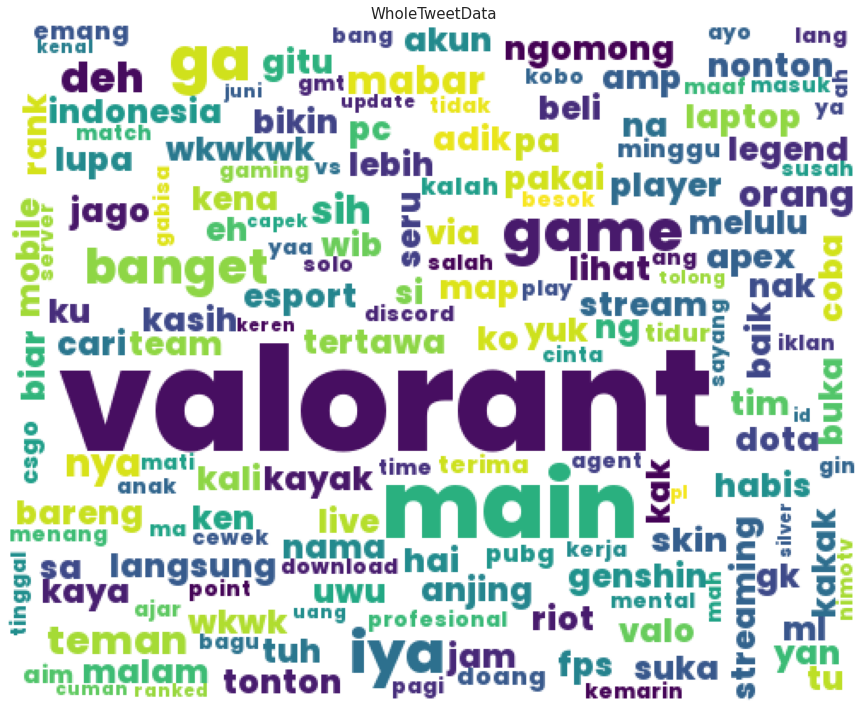

In [ ]:
dfVisualisasi = tweets.copy()

kumpulanKata = []

for row in dfVisualisasi ['text_preprocessed']:
  kumpulanKata += row


wordcloud = WordCloud(font_path = '/content/drive/MyDrive/POPPINS-EXTRABOLD.TTF',
                       width = 500, height = 400, background_color ='white', 
                      min_font_size= 10, collocations=False).generate("".join (x + " " for x in kumpulanKata))
fig, ax = plt.subplots(figsize = (30,10))
ax.set_title('WholeTweetData', fontsize=15)
ax.grid(False)
ax.imshow((wordcloud))
fig.tight_layout(pad=0)
ax.axis('off')
plt.show()

3.3 WordCloud Positive & Negative Words

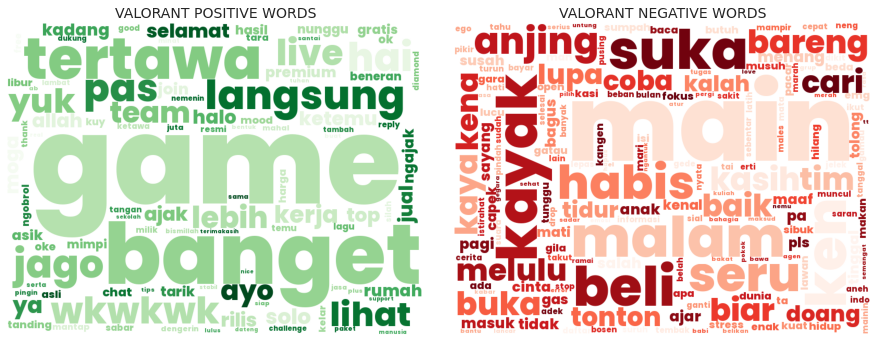

In [ ]:
def sentiments_words(text):
  positive_words=[]
  negative_words=[]
  neutral_words=[]
  for word in text:
    score_pos=0
    score_neg=0
    if (word in lexicon_positive):
      score_pos = lexicon_positive[word]
    if (word in lexicon_negative):
      score_pos = lexicon_negative[word]
    
    if (score_pos + score_neg > 0):
      positive_words.append(word)
    elif (score_pos + score_neg < 0):
      negative_words.append(word)

  return positive_words, negative_words

sentiment_words = tweets['text_preprocessed'].apply(sentiments_words)
sentiment_words = list(zip(*sentiment_words))
positive_words = sentiment_words[0]
negative_words = sentiment_words[1]

fig, ax=plt.subplots(1,2, figsize=(12,10))
list_words_positive =''
for row_word in positive_words:
  for word in row_word:
    if word not in ['terima']:
      list_words_positive += ' '+(word)
wordcloud_positive = WordCloud(font_path = '/content/drive/MyDrive/POPPINS-EXTRABOLD.TTF',width = 800, height=600, background_color='white', colormap='Greens', 
                               min_font_size=10, collocations=False).generate(list_words_positive)
ax[0].set_title('VALORANT POSITIVE WORDS', fontsize=14)
ax[0].grid(False)
ax[0].imshow(wordcloud_positive)
fig.tight_layout(pad=0)
ax[0].axis('off')

list_words_negative =''
for row_word in negative_words:
  for word in row_word:
    if word not in ['terima']:
      list_words_negative += ' '+(word)
wordcloud_negative = WordCloud(font_path = '/content/drive/MyDrive/POPPINS-EXTRABOLD.TTF',width = 800, height=600, background_color='white', colormap='Reds', 
                               min_font_size=10, collocations=False).generate(list_words_negative)
ax[1].set_title('VALORANT NEGATIVE WORDS', fontsize=14)
ax[1].grid(False)
ax[1].imshow(wordcloud_negative)
fig.tight_layout(pad=0)
ax[1].axis('off')

plt.show()


Top Tweet yang mempunyai skor polaritas positif tertinggi

positive    5116
neutral     4146
Name: polarity, dtype: int64

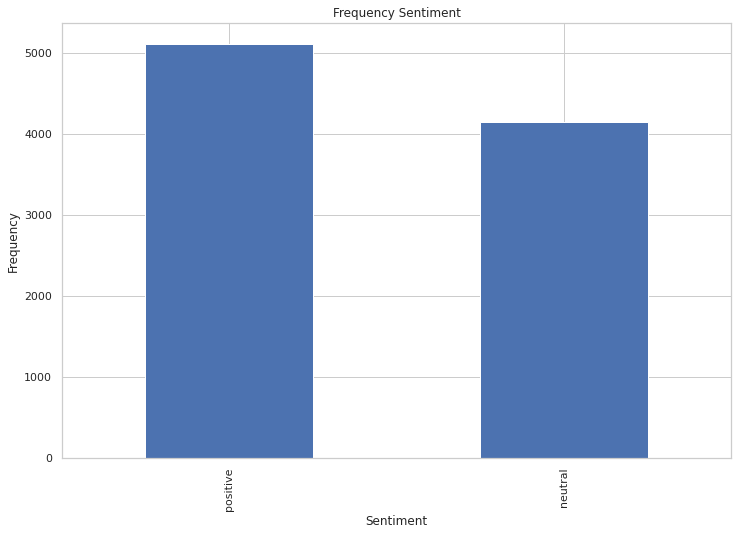

In [ ]:
ax = tweets ['polarity'].value_counts().plot(kind='bar',figsize= (12,8), title= 'Frequency Sentiment',  xlabel='Sentiment', ylabel= 'Frequency', legend = False)
tweets['polarity'].value_counts()

#4. Feature Engeenering

In [ ]:
pd.set_option('display.max_colwidth', 3000)
positive_tweets = tweets[tweets['polarity'] == 'positive']
positive_tweets = positive_tweets[['text_clean', 'polarity_score', 'polarity']].sort_values(by = 'polarity_score', ascending=False).reset_index(drop = True)
positive_tweets.index += 1
positive_tweets[0:10]

,text_clean,polarity_score,polarity
1,karpet merah aku cinta valorant aku cinta valorant aku cinta valorant aku cinta valorant aku cinta valorant aku cinta valorant aku cinta valorant aku cinta valorant aku cinta valorant aku cinta valorant aku cinta valorant aku cinta valorant aku cinta valorant aku cinta valorant,92,positive
2,soalnya pen seru seru aja pengen ngerasain main game ama temen temen aing yg cewek kek misal lu nemu makanan enak pasti pengen kasih tahu ke temen kan nah feelnya sama pengen seru seruan mabar valorant sama anak anak sky dan ceo,84,positive
3,tapi yang namanya bebas berpendapat dan twitter tempat yang tepat untuk mengeluarkan pendapatnya yaudah gapapa yang terpicu monggo yang ngga monggo yang penting lu semua happy keluarga sehat walafiat harmonis dan semoga yang maen valorant kaya yanuar pelernya kepotong gergaji tai,74,positive
4,y kata gue mending ajak aja si x soalnya gue tau rasanya gak diajak gaenak banget nanti rasanya left out banget meanwhile jiji dkk suka gak ngajak si y buat main valorant krn ngira y gak enjoy pas main soalnya diem bae,72,positive
5,keren kan ternyata dengan bermain valorant tidak hanya sekadar bermain saja tapi juga belajar teamworknah sekarang sudah mengerti kan hal yang terpenting saat membentuk teamwork yang bagus apa saja kalau kakak menemukan tips efektif lainnya yuk berbagi di kolom komentar,66,positive
6,halo mutualku aku mau bantuin abang aku yang lagi rajin ngestreaming banget wkwkwk abang aku streaming di twitch biasanya dia main game valorant genshin sama apex kalo kalian demen atau tertarik bisa bantu support abang aku ya makasih banyak,64,positive
7,haiii selamat malam juga ka maca lagi valorant aja sihhh ga ngapa ngapain lagiii wididih sama dong tos aku juga kalau sebelum tidur biasanya nonton kobo sama dulu wkwk karena seru aja gt okey terimakasih selamat tidur selamat beristirahat jugaaaa marshajkt,62,positive
8,terima kasih yang sudah mampir sudah subscribe sudah donasi sudah main bareng dan ngobrol seru seruan di stream valorantsebenernya sih masih seger karena tadi sempet tidur tapi harus turu dulu karena besok masih ngedit ngedit videothank you selamat beristirahat,60,positive
9,hardcore valorant gamer jangan terlalu try hard dan enjoy main game nya fun aja masih banyak waktu untuk belajar pelan dan fokus kuasai basic nya kalau punya pc bagus dan hz pasti lebih jago dan bisa sentuh diamond atau pun immo intinya modal jam terbang pc bagus jago,60,positive
10,whaaatttbuang waktuu ya beda si ya preferensi orggua pikir krn lu dulu seneng nulis dan suka baca bakal demen bgt sm ceritanya krn penulis nya keren bgt yg kmren pdhl ceritanya xiao hampir mati huhuhu kl mau yang pure battle mah better kek mlvalorantetc,60,positive


In [ ]:
# gabung kembali kata-kata yang sudah di tokenisasi menjadi satu kalimat
X = tweets['text_preprocessed'].apply(toSentence) 
max_features = 20000

#lalu tokenisasi kembali kalimat tersebut dengan membatasi jumlah
#fitur sesuai dengan 'max_features'
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(X.values)
X = tokenizer.texts_to_sequences(X.values)
X = pad_sequences(X)
X.shape

(9262, 49)

In [ ]:
data = tweets.query('polarity!="neutral"')
data.head()

,Datetime,Text,Username,text_clean,text_preprocessed,polarity_score,polarity
0,2022-06-24 23:28:36+00:00,"@babufess Fyi gacuma game genshin aja, jadi kalian smua hatihati ya, tmen rlku yg main valorant jg pernah kena",Eulayakarataki,fyi gacuma game genshin aja jadi kalian smua hatihati ya tmen rlku yg main valorant jg pernah kena,"[bagai, informasi, gacuma, game, genshin, smua, hatihati, iya, tmen, rlku, main, valorant, kena]",12,positive
2,2022-06-24 23:05:42+00:00,"Kembali lagi dengan badut Valorant profesional kalian, yang siap menemani malam minggu kalian. Tapi kali ini, Louis ditemani oleh @AzathelOtheus. Kami akan memainkan game ini pada :\n\n📅: Fri, 26st of June 2022\n🕐: 20.00 GMT+7\n🔗: https://t.co/Re6rfK2y58\n\nSee you at the stream~ https://t.co/WM7OR6UH7H",LouisAguillard,kembali lagi dengan badut valorant profesional kalian yang siap menemani malam minggu kalian tapi kali ini louis ditemani oleh kami akan memainkan game ini pada fri st of june gmt see you at the stream,"[badut, valorant, profesional, tani, malam, minggu, kali, louis, tani, main, game, fri, st, of, june, gmt, see, you, at, the, stream]",8,positive
7,2022-06-24 22:05:14+00:00,6 Cara Mudah Mengatasi Valorant Voice Chat Tidak Berfungsi https://t.co/OHMFUdTX4q,LeeSt4di,cara mudah mengatasi valorant voice chat tidakberfungsi,"[mudah, atas, valorant, voice, chat, tidakberfungsi]",14,positive
11,2022-06-24 21:19:33+00:00,"Tik Tok, Valorant, Bloodhunt, memes, ayo? https://t.co/UuN23dnY8e",say10_tv,tik tok valorant bloodhunt memes ayo,"[tik, tok, valorant, bloodhunt, mes, ayo]",8,positive
13,2022-06-24 21:15:04+00:00,"@Fauzansudutkiri @gendisdailyshop @MafiaWasit hal kayak gini mirip2 negara lain yg ban rusia, ada player valorant, player e-sport lain di ban karna dia org rusia, kerjasama batal karna rusia lagi invasi padahal ga ada hubungannya org lomba dengan perang",ntatudung,hal kayak gini mirip negara lain yg ban rusia ada player valorant player esport lain di ban karna dia org rusia kerjasama batal karna rusia lagi invasi padahal ga ada hubungannya org lomba dengan perang,"[kayak, gin, negara, ban, rusia, player, valorant, player, esport, ban, orang, rusia, kerjasama, batal, rusia, invasi, ga, hubung, orang, lomba, perang]",8,positive


#5. Model LSTM, BILSTM, GRU

LSTM

In [ ]:
# gabung kembali kata-kata yang sudah di tokenisasi menjadi satu kalimat
X = data['text_preprocessed'].apply(toSentence) 
max_features = 20000

tfidf_vector = TfidfVectorizer(analyzer='word', max_features = 20000)
tfidf_vector.fit(X.values)
X = tokenizer.texts_to_sequences(X.values)
X = pad_sequences(X)
X.shape
print(X)

[[   0    0    0 ...    2    1   77]
 [   0    0    0 ...  264   60   24]
 [   0    0    0 ... 1171  402 4979]
 ...
 [   0    0    0 ... 4964    1   58]
 [   0    0    0 ...    0  236    1]
 [   0    0    0 ...    1   46 2965]]


In [ ]:
# rubah label menjadi data numerik
polarity_encode = {'negative' : 0, 'positive' : 1}
y = data['polarity'].map(polarity_encode).values

# pisahkan data kita menjadi dua bagian, 80% untuk training, dan 20% untuk testing/validasi
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(4092, 49) (4092,)
(1024, 49) (1024,)


In [ ]:
def create_model(embed_dim = 16, hidden_unit = 16, dropout_rate = 0.2, optimizers = Adam, learning_rate = 0.001):
    model = Sequential()
    model.add(Embedding(input_dim = max_features, output_dim = embed_dim, input_length = X_train.shape[1]))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(units = hidden_unit, activation = 'tanh'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(units = 3, activation = 'softmax'))
    model.compile(loss = 'sparse_categorical_crossentropy', optimizer = optimizers(lr = learning_rate), metrics = ['accuracy'])
    print(model.summary())
    return model

In [ ]:
from keras.layers.recurrent import LSTM, GRU,SimpleRNN
# buat model ML kita
model = KerasClassifier(build_fn = create_model,
                        # Model Parameters
                        dropout_rate = 0.2,
                        embed_dim = 64,
                        hidden_unit = 32,
                        optimizers = Adam,
                        learning_rate = 0.001,
                   
                        # Fit Parameters
                        epochs=50, 
                        batch_size=512,
                        # ambil 20% dari data training kita sebagai data validasi sementara
                        validation_split = 0.1)
                         

model_prediction = model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  from ipykernel import kernelapp as app


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 49, 64)            1280000   
                                                                 
 dropout (Dropout)           (None, 49, 64)            0         
                                                                 
 lstm (LSTM)                 (None, 32)                12416     
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense (Dense)               (None, 3)                 99        
                                                                 
Total params: 1,292,515
Trainable params: 1,292,515
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


None
Epoch 1/50
8/8 [==============================] - 5s 227ms/step - loss: 1.0456 - accuracy: 0.9136 - val_loss: 0.9533 - val_accuracy: 1.0000
Epoch 2/50
8/8 [==============================] - 1s 180ms/step - loss: 0.8536 - accuracy: 1.0000 - val_loss: 0.6251 - val_accuracy: 1.0000
Epoch 3/50
8/8 [==============================] - 1s 169ms/step - loss: 0.3979 - accuracy: 1.0000 - val_loss: 0.1064 - val_accuracy: 1.0000
Epoch 4/50
8/8 [==============================] - 1s 169ms/step - loss: 0.0599 - accuracy: 1.0000 - val_loss: 0.0199 - val_accuracy: 1.0000
Epoch 5/50
8/8 [==============================] - 1s 170ms/step - loss: 0.0179 - accuracy: 1.0000 - val_loss: 0.0093 - val_accuracy: 1.0000
Epoch 6/50
8/8 [==============================] - 1s 171ms/step - loss: 0.0100 - accuracy: 1.0000 - val_loss: 0.0057 - val_accuracy: 1.0000
Epoch 7/50
8/8 [==============================] - 1s 169ms/step - loss: 0.0066 - accuracy: 1.0000 - val_loss: 0.0040 - val_accuracy: 1.0000
Epoch 8/50
8/8 

In [ ]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Model Accuracy on Test Data:', accuracy)

Model Accuracy on Test Data: 1.0


In [ ]:
import nltk
nltk.download('stopwords')
otherData = pd.DataFrame()
otherData['text'] = ['Valorant adalah game yang sangat menyenangkan',
                     'toxic banget komunitas valorant, bikin nga nyaman main' 
                    ]
gkounter = 0
otherData['text_clean'] = otherData['text'].apply(cleaningText)
gkounter = 0
otherData['text_clean'] = otherData['text_clean'].apply(casefoldingText)
otherData.drop(['text'], axis = 1, inplace = True)
gkounter = 0
otherData['text_preprocessed'] = otherData['text_clean'].apply(tokenizingText)
gkounter = 0
otherData['text_preprocessed'] = otherData['text_preprocessed'].apply(filteringText)
gkounter = 0
otherData['text_preprocessed'] = otherData['text_preprocessed'].apply(stemmingText)
otherData

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


cleaned 0 text
cleaned 1 text
casefolded 0 text
casefolded 1 text
tokenized 0 text
tokenized 1 text
filtered 0 text
filtered 1 text
stemmed 0 text
stemmed 1 text


,text_clean,text_preprocessed
0,valorant adalah game yang sangat menyenangkan,"[valorant, game, senang]"
1,toxic banget komunitas valorant bikin nga nyaman main,"[toxic, banget, komunitas, valorant, bikin, nga, nyaman, main]"


In [ ]:
X_otherData = otherData['text_preprocessed'].apply(toSentence)
X_otherData = tokenizer.texts_to_sequences(X_otherData.values)
X_otherData = pad_sequences(X_otherData, maxlen = X.shape[1])
X_otherData

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    1,    5, 1059],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,  284,    6, 1579,
           1,   46,  250, 1199,    2]], dtype=int32)

In [ ]:
y_pred_otherData = model.predict(X_otherData)
otherData['Result Prediction'] = y_pred_otherData

polarity_decode = {0 : 'Negative', 1 : 'Positive'}
otherData['Result Prediction'] = otherData['Result Prediction'].map(polarity_decode)
otherData

,text_clean,text_preprocessed,Result Prediction
0,valorant adalah game yang sangat menyenangkan,"[valorant, game, senang]",Positive
1,toxic banget komunitas valorant bikin nga nyaman main,"[toxic, banget, komunitas, valorant, bikin, nga, nyaman, main]",Positive


BILSTM

In [ ]:
 import numpy as np
 from keras.preprocessing import sequence
 from keras.models import Sequential
 from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional
 

In [ ]:
# gabung kembali kata-kata yang sudah di tokenisasi menjadi satu kalimat
X = data['text_preprocessed'].apply(toSentence) 
max_features = 20000

tfidf_vector = TfidfVectorizer(analyzer='word', max_features = 20000)
tfidf_vector.fit(X.values)
X = tokenizer.texts_to_sequences(X.values)
X = pad_sequences(X)
X.shape
print(X)

[[   0    0    0 ...    2    1   77]
 [   0    0    0 ...  264   60   24]
 [   0    0    0 ... 1171  402 4979]
 ...
 [   0    0    0 ... 4964    1   58]
 [   0    0    0 ...    0  236    1]
 [   0    0    0 ...    1   46 2965]]


In [ ]:
# rubah label menjadi data numerik
polarity_encode = {'negative' : 0, 'positive' : 1}
y = data['polarity'].map(polarity_encode).values

# pisahkan data kita menjadi dua bagian, 80% untuk training, dan 20% untuk testing/validasi
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(4092, 49) (4092,)
(1024, 49) (1024,)


In [ ]:
def create_model(embed_dim = 16, hidden_unit = 16, dropout_rate= 0.2, optimizers = Adam, learning_rate = 0.001):
  model = Sequential()
  model.add(Embedding(input_dim = max_features, output_dim = embed_dim, input_length = X_train.shape[1]))
  model.add(Dropout(dropout_rate))
  model.add(Bidirectional(LSTM(units = hidden_unit, activation= 'tanh')))
  model.add(Dropout(dropout_rate))
  model.add(Dense(units = 3, activation='softmax'))
  model.compile(loss = 'sparse_categorical_crossentropy', optimizer=optimizers(lr = learning_rate), metrics = ['accuracy']) #
  print(model.summary())
  return model

In [ ]:
from keras.layers.recurrent import LSTM

# buat model ML kita
modelBi = KerasClassifier(build_fn = create_model,
                        # Model Parameters
                        dropout_rate = 0.2,
                        embed_dim = 64,
                        hidden_unit = 32,
                        optimizers = Adam,
                        learning_rate = 0.001,
                   
                        # Fit Parameters
                        epochs=50, 
                        batch_size=512,
                        # ambil 20% dari data training kita sebagai data validasi sementara
                        validation_split = 0.1)
                         

modelBi_prediction = modelBi.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  app.launch_new_instance()


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 49, 64)            1280000   
                                                                 
 dropout_18 (Dropout)        (None, 49, 64)            0         
                                                                 
 bidirectional_7 (Bidirectio  (None, 64)               24832     
 nal)                                                            
                                                                 
 dropout_19 (Dropout)        (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 3)                 195       
                                                                 
Total params: 1,305,027
Trainable params: 1,305,027
Non-trainable params: 0
___________________________________________

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


None
Epoch 1/50
8/8 [==============================] - 18s 741ms/step - loss: 1.0554 - accuracy: 0.7184 - val_loss: 0.9389 - val_accuracy: 1.0000
Epoch 2/50
8/8 [==============================] - 3s 392ms/step - loss: 0.8398 - accuracy: 1.0000 - val_loss: 0.6388 - val_accuracy: 1.0000
Epoch 3/50
8/8 [==============================] - 3s 318ms/step - loss: 0.4342 - accuracy: 1.0000 - val_loss: 0.1109 - val_accuracy: 1.0000
Epoch 4/50
8/8 [==============================] - 3s 313ms/step - loss: 0.0442 - accuracy: 1.0000 - val_loss: 0.0057 - val_accuracy: 1.0000
Epoch 5/50
8/8 [==============================] - 4s 457ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.0016 - val_accuracy: 1.0000
Epoch 6/50
8/8 [==============================] - 4s 506ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 8.8759e-04 - val_accuracy: 1.0000
Epoch 7/50
8/8 [==============================] - 5s 631ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 6.2073e-04 - val_accuracy: 1.0000
Epoch 

In [ ]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Model Accuracy on Test Data:', accuracy)

Model Accuracy on Test Data: 1.0


In [ ]:
import nltk
nltk.download('stopwords')
otherData = pd.DataFrame()
otherData['text'] = ['Valorant adalah game yang sangat menyenangkan',
                     'toxic banget komunitas valorant, bikin nga nyaman main' 
                    ]
gkounter = 0
otherData['text_clean'] = otherData['text'].apply(cleaningText)
gkounter = 0
otherData['text_clean'] = otherData['text_clean'].apply(casefoldingText)
otherData.drop(['text'], axis = 1, inplace = True)
gkounter = 0
otherData['text_preprocessed'] = otherData['text_clean'].apply(tokenizingText)
gkounter = 0
otherData['text_preprocessed'] = otherData['text_preprocessed'].apply(filteringText)
gkounter = 0
otherData['text_preprocessed'] = otherData['text_preprocessed'].apply(stemmingText)
otherData

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


cleaned 0 text
cleaned 1 text
casefolded 0 text
casefolded 1 text
tokenized 0 text
tokenized 1 text
filtered 0 text
filtered 1 text
stemmed 0 text
stemmed 1 text


,text_clean,text_preprocessed
0,valorant adalah game yang sangat menyenangkan,"[valorant, game, senang]"
1,toxic banget komunitas valorant bikin nga nyaman main,"[toxic, banget, komunitas, valorant, bikin, nga, nyaman, main]"


In [ ]:
X_otherData = otherData['text_preprocessed'].apply(toSentence)
X_otherData = tokenizer.texts_to_sequences(X_otherData.values)
X_otherData = pad_sequences(X_otherData, maxlen = X.shape[1])
X_otherData

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    1,    5, 1059],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,  284,    6, 1579,
           1,   46,  250, 1199,    2]], dtype=int32)

In [ ]:
y_pred_otherData = model.predict(X_otherData)
otherData['Result Prediction'] = y_pred_otherData

polarity_decode = {0 : 'Negative', 1 : 'Positive'}
otherData['Result Prediction'] = otherData['Result Prediction'].map(polarity_decode)
otherData

,text_clean,text_preprocessed,Result Prediction
0,valorant adalah game yang sangat menyenangkan,"[valorant, game, senang]",Positive
1,toxic banget komunitas valorant bikin nga nyaman main,"[toxic, banget, komunitas, valorant, bikin, nga, nyaman, main]",Positive


GRU

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import recurrent

In [ ]:
# gabung kembali kata-kata yang sudah di tokenisasi menjadi satu kalimat
X = data['text_preprocessed'].apply(toSentence) 
max_features = 20000

tfidf_vector = TfidfVectorizer(analyzer='word', max_features = 20000)
tfidf_vector.fit(X.values)
X = tokenizer.texts_to_sequences(X.values)
X = pad_sequences(X)
X.shape
print(X)

[[   0    0    0 ...    2    1   77]
 [   0    0    0 ...  264   60   24]
 [   0    0    0 ... 1171  402 4979]
 ...
 [   0    0    0 ... 4964    1   58]
 [   0    0    0 ...    0  236    1]
 [   0    0    0 ...    1   46 2965]]


In [ ]:
# rubah label menjadi data numerik
polarity_encode = {'negative' : 0, 'positive' : 1}
y = data['polarity'].map(polarity_encode).values

# pisahkan data kita menjadi dua bagian, 80% untuk training, dan 20% untuk testing/validasi
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(4092, 49) (4092,)
(1024, 49) (1024,)


In [ ]:
def create_model(embed_dim = 16, hidden_unit = 16, dropout_rate= 0.2, optimizers = Adam, learning_rate = 0.001):
  model = Sequential()
  model.add(Embedding(input_dim = max_features, output_dim = embed_dim, input_length = X_train.shape[1]))
  model.add(Dropout(dropout_rate))
  model.add(layers.GRU(units = hidden_unit, activation= 'tanh', recurrent_activation = "sigmoid"))
  model.add(Dropout(dropout_rate))
  model.add(Dense(units = 3, activation='softmax'))
  model.compile(loss = 'sparse_categorical_crossentropy', optimizer=optimizers(lr = learning_rate), metrics = ['accuracy']) #
  print(model.summary())
  return model

In [ ]:
model = KerasClassifier(build_fn = create_model, dropout_rate = 0.2, 
                        embed_dim = 64, hidden_unit = 32, optimizers = Adam, 
                        learning_rate = 0.001, epochs = 50, batch_size = 512, 
                        validation_split = 0.1)

model_prediction = model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  after removing the cwd from sys.path.


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, 49, 64)            1280000   
                                                                 
 dropout_20 (Dropout)        (None, 49, 64)            0         
                                                                 
 gru (GRU)                   (None, 32)                9408      
                                                                 
 dropout_21 (Dropout)        (None, 32)                0         
                                                                 
 dense_9 (Dense)             (None, 3)                 99        
                                                                 
Total params: 1,289,507
Trainable params: 1,289,507
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


None
Epoch 1/50
8/8 [==============================] - 13s 469ms/step - loss: 1.0464 - accuracy: 0.8007 - val_loss: 0.9578 - val_accuracy: 1.0000
Epoch 2/50
8/8 [==============================] - 2s 210ms/step - loss: 0.8848 - accuracy: 1.0000 - val_loss: 0.7629 - val_accuracy: 1.0000
Epoch 3/50
8/8 [==============================] - 2s 208ms/step - loss: 0.6490 - accuracy: 1.0000 - val_loss: 0.4669 - val_accuracy: 1.0000
Epoch 4/50
8/8 [==============================] - 2s 246ms/step - loss: 0.3155 - accuracy: 1.0000 - val_loss: 0.1151 - val_accuracy: 1.0000
Epoch 5/50
8/8 [==============================] - 2s 247ms/step - loss: 0.0469 - accuracy: 1.0000 - val_loss: 0.0045 - val_accuracy: 1.0000
Epoch 6/50
8/8 [==============================] - 2s 250ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 6.4477e-04 - val_accuracy: 1.0000
Epoch 7/50
8/8 [==============================] - 2s 292ms/step - loss: 7.1090e-04 - accuracy: 1.0000 - val_loss: 3.0352e-04 - val_accuracy: 1.0000
Ep

In [ ]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Model Accuracy on Test Data:', accuracy)

Model Accuracy on Test Data: 1.0


In [ ]:
import nltk
nltk.download('stopwords')
otherData = pd.DataFrame()
otherData['text'] = ['Valorant adalah game yang sangat menyenangkan',
                     'toxic banget komunitas valorant, bikin nga nyaman main' 
                    ]
gkounter = 0
otherData['text_clean'] = otherData['text'].apply(cleaningText)
gkounter = 0
otherData['text_clean'] = otherData['text_clean'].apply(casefoldingText)
otherData.drop(['text'], axis = 1, inplace = True)
gkounter = 0
otherData['text_preprocessed'] = otherData['text_clean'].apply(tokenizingText)
gkounter = 0
otherData['text_preprocessed'] = otherData['text_preprocessed'].apply(filteringText)
gkounter = 0
otherData['text_preprocessed'] = otherData['text_preprocessed'].apply(stemmingText)
otherData

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


cleaned 0 text
cleaned 1 text
casefolded 0 text
casefolded 1 text
tokenized 0 text
tokenized 1 text
filtered 0 text
filtered 1 text
stemmed 0 text
stemmed 1 text


,text_clean,text_preprocessed
0,valorant adalah game yang sangat menyenangkan,"[valorant, game, senang]"
1,toxic banget komunitas valorant bikin nga nyaman main,"[toxic, banget, komunitas, valorant, bikin, nga, nyaman, main]"


In [ ]:
X_otherData = otherData['text_preprocessed'].apply(toSentence)
X_otherData = tokenizer.texts_to_sequences(X_otherData.values)
X_otherData = pad_sequences(X_otherData, maxlen = X.shape[1])
X_otherData

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    1,    5, 1059],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,  284,    6, 1579,
           1,   46,  250, 1199,    2]], dtype=int32)

In [ ]:
y_pred_otherData = model.predict(X_otherData)
otherData['Result Prediction'] = y_pred_otherData

polarity_decode = {0 : 'Negative', 1 : 'Positive'}
otherData['Result Prediction'] = otherData['Result Prediction'].map(polarity_decode)
otherData

,text_clean,text_preprocessed,Result Prediction
0,valorant adalah game yang sangat menyenangkan,"[valorant, game, senang]",Positive
1,toxic banget komunitas valorant bikin nga nyaman main,"[toxic, banget, komunitas, valorant, bikin, nga, nyaman, main]",Positive


# Traditional Machine Learning

In [ ]:
dataset = data.copy()[['text_preprocessed', 'polarity_score']]

def categorize(row):
  if row > 0:
    return 1
  elif row < 0:
    return 0


dataset['polarity_score'] = dataset['polarity_score'].apply(categorize)
dataset['text_preprocessed'] = dataset['text_preprocessed'].apply(toSentence)
dataset

,text_preprocessed,polarity_score
0,bagai informasi gacuma game genshin smua hatihati iya tmen rlku main valorant kena,1
2,badut valorant profesional tani malam minggu kali louis tani main game fri st of june gmt see you at the stream,1
7,mudah atas valorant voice chat tidakberfungsi,1
11,tik tok valorant bloodhunt mes ayo,1
13,kayak gin negara ban rusia player valorant player esport ban orang rusia kerjasama batal rusia invasi ga hubung orang lomba perang,1
...,...,...
9251,terima kasih,1
9254,mahal game valorant,1
9256,deh duga fuuchan mentang valorant wkwkwk,1
9259,halo valorant,1


In [ ]:
# FEATURE ENGINEERING AND MODEL TRAINING
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer



train_x, valid_x, train_y, valid_y = model_selection.train_test_split(dataset['text_preprocessed'], dataset['polarity_score'])

encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
valid_y = encoder.fit_transform(valid_y)

In [ ]:
print(train_y)

[0 0 0 ... 0 0 0]


In [ ]:
tfidf_vector = TfidfVectorizer(analyzer='word', max_features = 20000)

tfidf_vector.fit(dataset['text_preprocessed'])
train_x = tfidf_vector.transform(train_x)
valid_x = tfidf_vector.transform(valid_x)

Naive Bayes

In [ ]:
from sklearn.naive_bayes import ComplementNB
from sklearn.model_selection import cross_val_score
import sklearn.metrics as metrics

modelNB = ComplementNB()
modelNB.fit(train_x, train_y)
cross_cnb = cross_val_score(modelNB, train_x, train_y,n_jobs = -1)
print("Cross Validation score = ",cross_cnb)  

y_pred = modelNB.predict(valid_x)
accuracy = accuracy_score(valid_y, y_pred)
print('Model Accuracy on Test Data:', accuracy)

accuracy = metrics.accuracy_score(modelNB.predict(valid_x), valid_y)
print("accuracy :", accuracy)

print(metrics.classification_report(valid_y, modelNB.predict(valid_x)))

Cross Validation score =  [1. 1. 1. 1. 1.]
Model Accuracy on Test Data: 1.0
accuracy : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1279

    accuracy                           1.00      1279
   macro avg       1.00      1.00      1.00      1279
weighted avg       1.00      1.00      1.00      1279



Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
modelDT = DecisionTreeClassifier()
modelDT.fit(train_x, train_y)
cross_dt = cross_val_score(modelDT, train_x, train_y,n_jobs = -1)
print("Cross Validation score = ",cross_dt) 

y_pred = modelDT.predict(valid_x)
accuracy = accuracy_score(valid_y, y_pred)
print('Model Accuracy on Test Data:', accuracy)

print(metrics.classification_report(valid_y, modelDT.predict(valid_x)))

Cross Validation score =  [1. 1. 1. 1. 1.]
Model Accuracy on Test Data: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1279

    accuracy                           1.00      1279
   macro avg       1.00      1.00      1.00      1279
weighted avg       1.00      1.00      1.00      1279



Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
modelFC = RandomForestClassifier()
modelFC.fit(train_x, train_y)
cross_FC = cross_val_score(modelFC, train_x, train_y,n_jobs = -1)
print("Cross Validation score = ",cross_FC) 

y_pred = modelFC.predict(valid_x)
accuracy = accuracy_score(valid_y, y_pred)
print('Model Accuracy on Test Data:', accuracy)

accuracy = metrics.accuracy_score(modelFC.predict(valid_x), valid_y)
print("accuracy :", accuracy)

print(metrics.classification_report(valid_y, modelFC.predict(valid_x)))

Cross Validation score =  [1. 1. 1. 1. 1.]
Model Accuracy on Test Data: 1.0
accuracy : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1279

    accuracy                           1.00      1279
   macro avg       1.00      1.00      1.00      1279
weighted avg       1.00      1.00      1.00      1279



>**Error Dikarenakan trainY = 0**

In [ ]:
print(train_y)

[0 0 0 ... 0 0 0]


Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
modelLR = LogisticRegression()
modelLR.fit(X_train, y_train)
cross_LR = cross_val_score(modelLR, X_train, y_train,n_jobs = -1)
print("Cross Validation score = ",cross_LR) 

y_pred = modelLR.predict(valid_x)
accuracy = accuracy_score(valid_y, y_pred)
print('Model Accuracy on Test Data:', accuracy)

print(metrics.classification_report(valid_y, modelLR.predict(valid_x)))

SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
modelDT = svm.SVC()
modelDT.fit(X_train, y_train)
cross_dt = cross_val_score(modelDT, X_train, y_train,n_jobs = -1)
print("Cross Validation score = ",cross_dt) 

y_pred = modelDT.predict(valid_x)
accuracy = accuracy_score(valid_y, y_pred)
print('Model Accuracy on Test Data:', accuracy)

print(metrics.classification_report(valid_y, modelDT.predict(valid_x)))

#Evaluasi Model

In [ ]:
y_test = model.predict(X_train)
accuracy = accuracy_score(y_train, y_test)
print('Model Accuracy on Text Data: ', accuracy)
confusion_matrix(y_train, y_test)

Model Accuracy on Text Data:  1.0


array([[4092]])

In [ ]:
import sklearn.metrics as metrics
y_pred = model.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print('Model Accuracy on Test Data:', accuracy)
confusion_matrix(y_train, y_pred)

accuracy = metrics.accuracy_score(model.predict(X_train), y_pred)
print('Acc :', accuracy)
precision = metrics.precision_score(model.predict(X_train), y_pred)
print('Prec :', precision)
recall = metrics.recall_score(model.predict(X_train), y_pred)
print('Rec :', recall)
MCC = metrics.matthews_corrcoef(y_train, y_pred)
print("MCC :",MCC)
print(metrics.classification_report(y_train, model.predict(X_train)))

Model Accuracy on Test Data: 1.0
Acc : 1.0
Prec : 1.0
Rec : 1.0
MCC : 0.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      4092

    accuracy                           1.00      4092
   macro avg       1.00      1.00      1.00      4092
weighted avg       1.00      1.00      1.00      4092



Count Vectorizer

In [ ]:
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(dataset['text_preprocessed'], dataset['polarity_score'])

encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
valid_y = encoder.fit_transform(valid_y)

from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer(analyzer='word', max_features=20000)

count_vector.fit(dataset['text_preprocessed'])
train_x = count_vector.transform(train_x)
valid_x = count_vector.transform(valid_x)

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
modelFC = RandomForestClassifier()
modelFC.fit(train_x, train_y)
cross_FC = cross_val_score(modelFC, train_x, train_y,n_jobs = -1)
print("Cross Validation score = ",cross_FC) 

y_pred = modelFC.predict(valid_x)
accuracy = accuracy_score(valid_y, y_pred)
print('Model Accuracy on Test Data:', accuracy)

accuracy = metrics.accuracy_score(modelFC.predict(valid_x), valid_y)
print("accuracy :", accuracy)

print(metrics.classification_report(valid_y, modelFC.predict(valid_x)))

Cross Validation score =  [1. 1. 1. 1. 1.]
Model Accuracy on Test Data: 1.0
accuracy : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1279

    accuracy                           1.00      1279
   macro avg       1.00      1.00      1.00      1279
weighted avg       1.00      1.00      1.00      1279

